### 1. Load Dataset:

In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


### 2. Exploratory Data Analysis (EDA):

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,FALSE,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,TURE,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,TURE,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,TURE,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,TURE,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,TURE,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
df["oldpeak"].describe()

count    846.000000
mean       0.891253
std        1.093875
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [6]:
#Handle missing values appropriately(oldpeak)
mean_oldpeak = df["oldpeak"].mean()
print(mean_oldpeak)

0.8912529550827422


In [7]:
df["oldpeak"] = df["oldpeak"].fillna(mean_oldpeak)

In [8]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num


In [9]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [10]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.232718,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.152162,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.028744,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.022756,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.128728,-0.323058
oldpeak,0.232718,0.152162,0.028744,0.022756,-0.128728,1.000000,0.416580
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.416580,1.000000


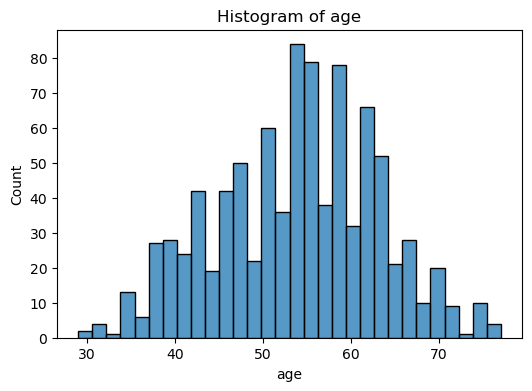

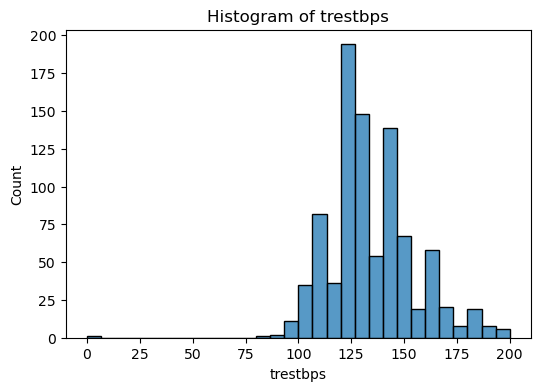

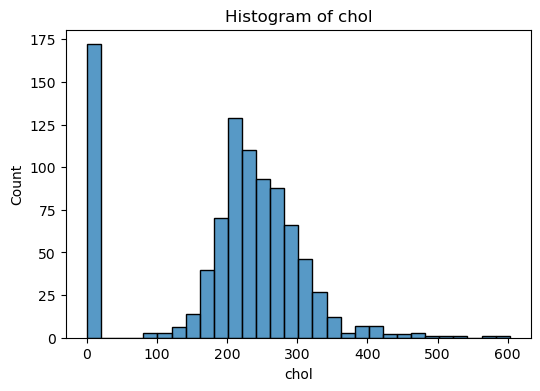

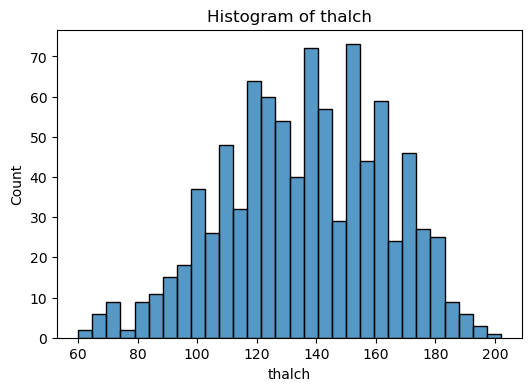

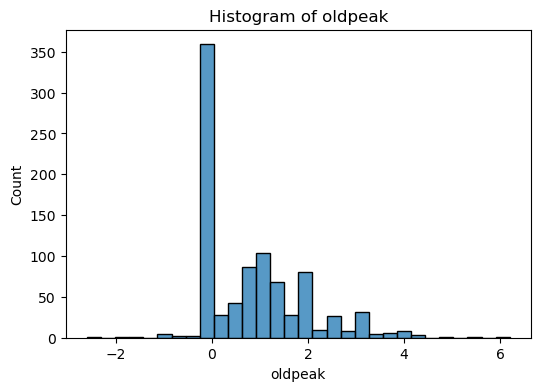

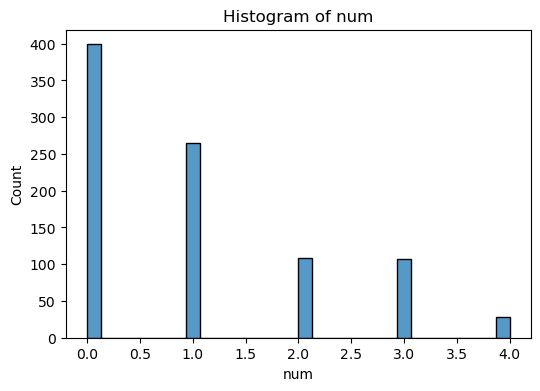

In [11]:
#Histogram
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols[:13]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],  bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

<Axes: >

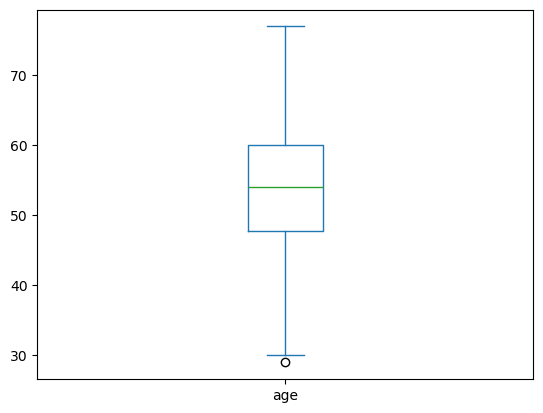

In [12]:
#boxplot
df["age"].plot(kind="box")

In [13]:
Q1 = np.percentile(df["age"],25)
Q3 = np.percentile(df["age"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [14]:
print("Number of outliers present in age Column : ",len(df[df["age"]>UW]))
print("Number of outliers present in age Column : ",len(df[df["age"]<LW]))

Number of outliers present in age Column :  0
Number of outliers present in age Column :  1


In [16]:
df[df["age"]>UW] = UW
df[df["age"]<LW] = LW

In [17]:
print("Number of outliers present in age Column : ",len(df[df["age"]>UW]))
print("Number of outliers present in age Column : ",len(df[df["age"]<LW]))

Number of outliers present in age Column :  0
Number of outliers present in age Column :  0


<Axes: >

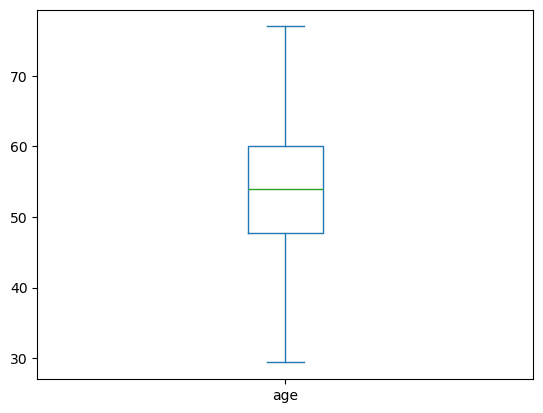

In [18]:
#boxplot after removing outliers
df["age"].plot(kind="box")

<Axes: >

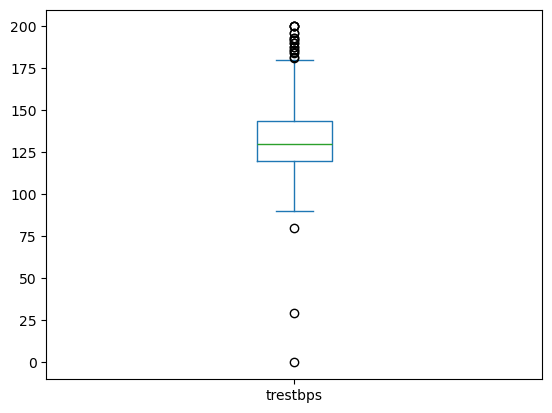

In [19]:
df["trestbps"].plot(kind="box")

In [20]:
Q1 = np.percentile(df["trestbps"],25)
Q3 = np.percentile(df["trestbps"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [21]:
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]>UW]))
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]<LW]))

Number of outliers present in trestbps Column :  20
Number of outliers present in trestbps Column :  3


In [22]:
df.loc[df["trestbps"]>UW] = UW
df.loc[df["trestbps"]<LW] = LW

In [23]:
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]>UW]))
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]<LW]))

Number of outliers present in trestbps Column :  0
Number of outliers present in trestbps Column :  0


<Axes: >

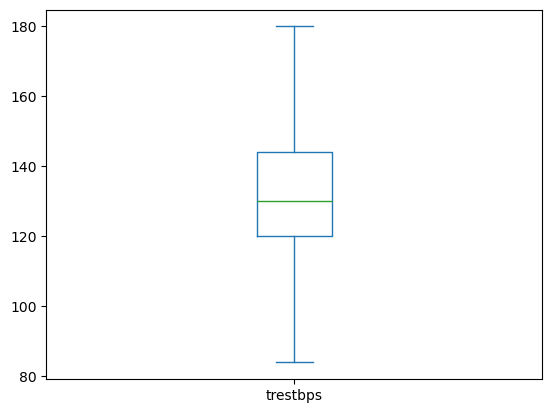

In [24]:
#after removing outliers
df["trestbps"].plot(kind="box")

<Axes: >

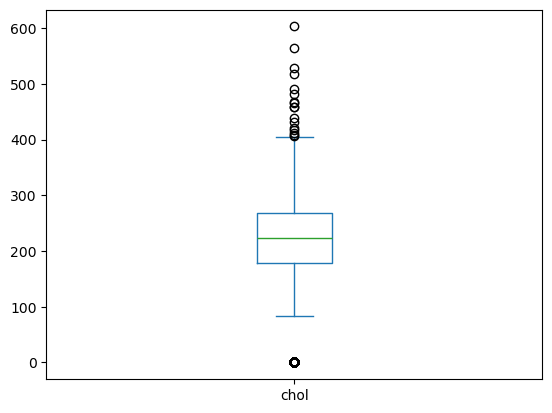

In [25]:
df["chol"].plot(kind="box")

In [26]:
Q1 = np.percentile(df["chol"],25)
Q3 = np.percentile(df["chol"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [27]:
print("Number of outliers present in chol Column : ",len(df[df["chol"]>UW]))
print("Number of outliers present in chol Column : ",len(df[df["chol"]<LW]))

Number of outliers present in chol Column :  17
Number of outliers present in chol Column :  164


In [28]:
df[df["chol"]>UW] = UW
df[df["chol"]<LW] = LW

In [29]:
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]>UW]))
print("Number of outliers present in trestbps Column : ",len(df[df["trestbps"]<LW]))

Number of outliers present in trestbps Column :  0
Number of outliers present in trestbps Column :  0


<Axes: >

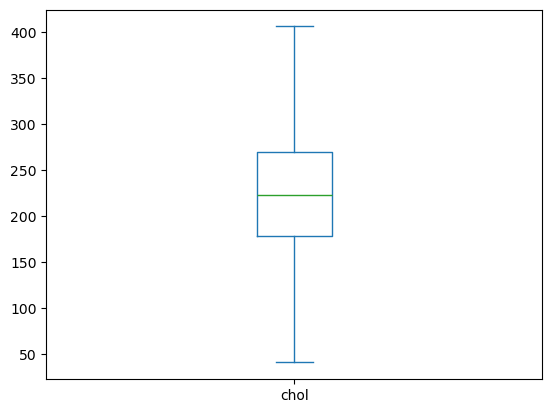

In [30]:
df["chol"].plot(kind="box")

<Axes: >

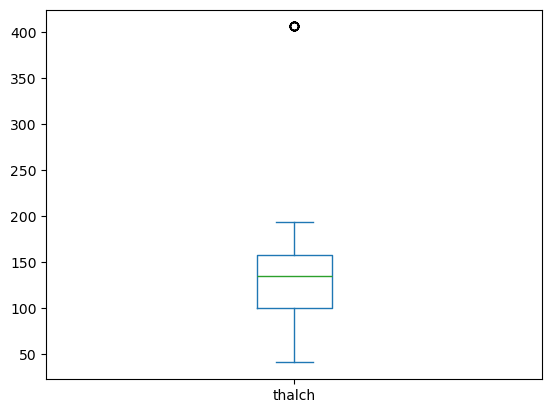

In [31]:
df["thalch"].plot(kind="box")

In [32]:
Q1 = np.percentile(df["thalch"],25)
Q3 = np.percentile(df["thalch"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [33]:
print("Number of outliers present in thalch Column : ",len(df[df["thalch"]>UW]))
print("Number of outliers present in thalch Column : ",len(df[df["thalch"]<LW]))

Number of outliers present in thalch Column :  17
Number of outliers present in thalch Column :  0


In [34]:
df[df["thalch"]>UW] = UW
df[df["thalch"]<LW] = LW

In [35]:
print("Number of outliers present in thalch Column : ",len(df[df["thalch"]>UW]))
print("Number of outliers present in thalch Column : ",len(df[df["thalch"]<LW]))

Number of outliers present in thalch Column :  0
Number of outliers present in thalch Column :  0


<Axes: >

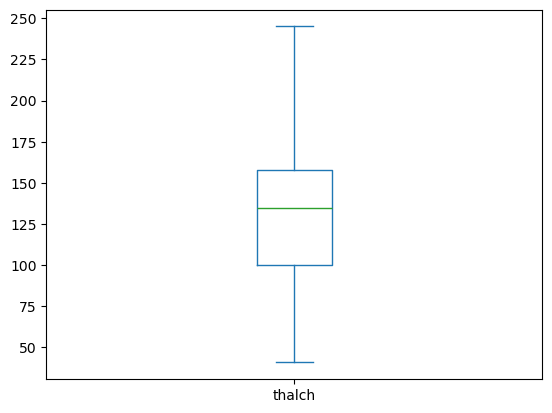

In [36]:
df["thalch"].plot(kind="box")

<Axes: >

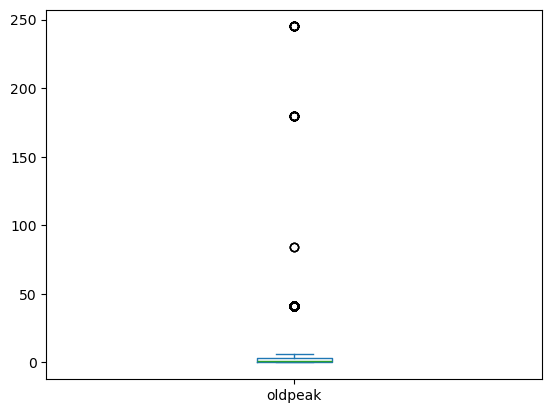

In [37]:
df["oldpeak"].plot(kind="box")

In [38]:
Q1 = np.percentile(df["oldpeak"],25)
Q3 = np.percentile(df["oldpeak"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [39]:
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]>UW]))
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]<LW]))

Number of outliers present in oldpeak Column :  204
Number of outliers present in oldpeak Column :  0


In [40]:
df[df["oldpeak"]>UW] = UW
df[df["oldpeak"]<LW] = LW

In [41]:
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]>UW]))
print("Number of outliers present in oldpeak Column : ",len(df[df["oldpeak"]<LW]))

Number of outliers present in oldpeak Column :  0
Number of outliers present in oldpeak Column :  0


<Axes: >

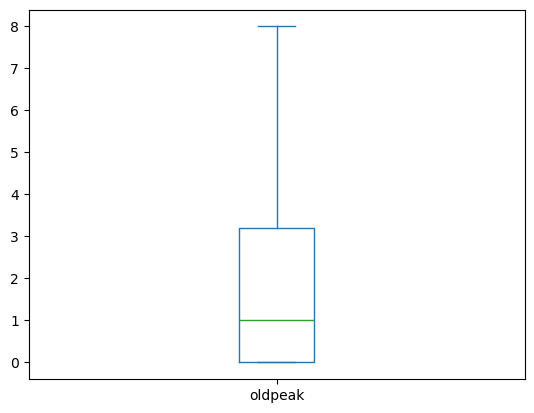

In [42]:
df["oldpeak"].plot(kind="box")

<Axes: >

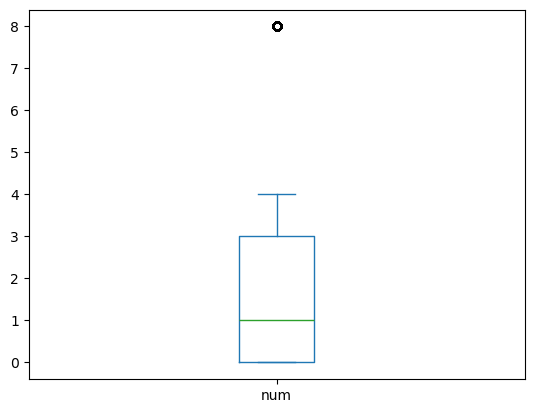

In [43]:
df["num"].plot(kind="box")

In [44]:
Q1 = np.percentile(df["num"],25)
Q3 = np.percentile(df["num"],75)
IQR = Q3 - Q1    
UW = Q3 + (1.5 * IQR)
LW = Q1 - (1.5 * IQR)

In [45]:
print("Number of outliers present in num Column : ",len(df[df["num"]>UW]))
print("Number of outliers present in num Column : ",len(df[df["num"]<LW]))

Number of outliers present in num Column :  204
Number of outliers present in num Column :  0


In [46]:
df[df["num"]>UW] = UW
df[df["num"]<LW] = LW

In [47]:
print("Number of outliers present in num Column : ",len(df[df["num"]>UW]))
print("Number of outliers present in num Column : ",len(df[df["num"]<LW]))

Number of outliers present in num Column :  0
Number of outliers present in num Column :  0


<Axes: >

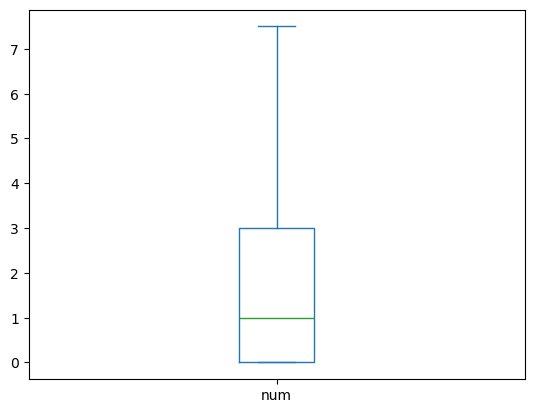

In [48]:
df["num"].plot(kind="box")

### 3. Feature Engineering

In [49]:
df.duplicated().sum() 

204

In [50]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [54]:
df["exang"].value_counts()

exang
False    414
True     253
TURE      22
FALSE     14
7.5        1
Name: count, dtype: int64

In [55]:
df.loc['exang'] = df['exang'].replace({'TURE': True, 'FALSE': False ,})

In [56]:
df["exang"].value_counts()

exang
False    414
True     253
TURE      22
FALSE     14
7.5        1
Name: count, dtype: int64

In [57]:
df = df[df['exang'].isin([True, False])]

In [58]:
df["exang"].value_counts()

exang
False    414
True     253
Name: count, dtype: int64

In [59]:
df_cat = df.select_dtypes(include=['object', 'bool'])

In [60]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE_cat = df_cat.apply(LE.fit_transform)
LE_cat = pd.DataFrame(LE_cat)
LE_cat.columns = list(df_cat)
LE_cat

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,0
1,1,1,0,1,0,1,0
2,1,0,0,1,0,1,0
3,1,3,0,0,0,1,0
4,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...
897,1,0,0,1,1,0,1
898,1,0,0,1,1,0,1
899,1,0,0,1,1,0,2
902,1,0,1,2,1,1,1


In [61]:
df_num = df.select_dtypes(include=['number']).drop('num', axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_num = SS.fit_transform(df_num)
SS_num = pd.DataFrame(SS_num)
SS_num.columns = list(df_num)
SS_num

,age,trestbps,chol,thalch,oldpeak
0,1.105727,0.738582,-0.197617,0.386330,1.275239
1,-1.313092,0.153784,-0.789758,-0.348622,-0.834650
2,0.446049,0.446183,-1.006877,0.304669,-0.467712
3,-0.103682,-0.840373,-1.125305,2.019556,-0.834650
4,0.446049,-1.308212,-0.829234,-0.593606,0.541365
...,...,...,...,...,...
662,1.105727,2.200577,-1.302947,-2.308493,1.458707
663,1.215673,0.095304,0.591904,-1.573541,2.834722
664,1.325619,0.212263,0.098453,-0.021976,2.834722
665,0.995780,1.615779,0.216882,-1.328557,1.917379


In [63]:
LE_cat = LE_cat.reset_index(drop=True)
SS_num = SS_num.reset_index(drop=True)


In [64]:
df_new = pd.concat([LE_cat,SS_num],axis=1)
df_new

,sex,cp,fbs,restecg,exang,slope,thal,age,trestbps,chol,thalch,oldpeak
0,1,3,1,0,0,0,0,1.105727,0.738582,-0.197617,0.386330,1.275239
1,1,1,0,1,0,1,0,-1.313092,0.153784,-0.789758,-0.348622,-0.834650
2,1,0,0,1,0,1,0,0.446049,0.446183,-1.006877,0.304669,-0.467712
3,1,3,0,0,0,1,0,-0.103682,-0.840373,-1.125305,2.019556,-0.834650
4,1,0,0,1,1,1,0,0.446049,-1.308212,-0.829234,-0.593606,0.541365
...,...,...,...,...,...,...,...,...,...,...,...,...
662,1,0,0,1,1,0,1,1.105727,2.200577,-1.302947,-2.308493,1.458707
663,1,0,0,1,1,0,1,1.215673,0.095304,0.591904,-1.573541,2.834722
664,1,0,0,1,1,0,2,1.325619,0.212263,0.098453,-0.021976,2.834722
665,1,0,1,2,1,1,1,0.995780,1.615779,0.216882,-1.328557,1.917379


### 4. Decision Tree Classification

In [65]:
X = df_new
Y = df["num"]

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [67]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')

In [68]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [69]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

In [71]:
print("Accuracy Score :",accuracy_score(Y_test,Y_pred_test))
print("Precision Score :",precision_score(Y_test,Y_pred_test, average='weighted'))
print("Recall Score :",recall_score(Y_test,Y_pred_test, average='weighted'))
print("F1_score Score :",f1_score(Y_test,Y_pred_test, average='weighted'))

Accuracy Score : 0.4626865671641791
Precision Score : 0.46592334355723297
Recall Score : 0.4626865671641791
F1_score Score : 0.46209395245410223


In [72]:
from sklearn.preprocessing import label_binarize

In [73]:
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))

In [74]:
fpr = {}
tpr = {}
thresholds = {}
roc_auc = {}
n_class = y_test_bin.shape[1]

for i in range(n_class):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_class
roc_auc["macro"] = auc(all_fpr, mean_tpr)

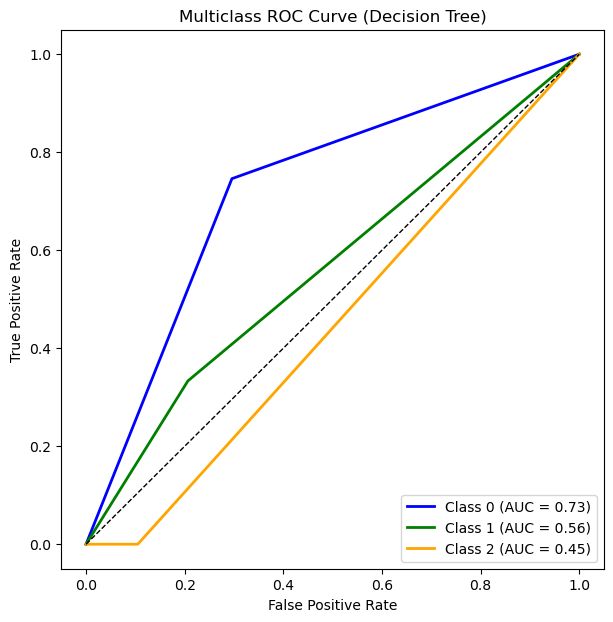

In [79]:
plt.figure(figsize=(7, 7))
for i, color in zip(range(n_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (Decision Tree)")
plt.legend(loc="lower right")
plt.show()

In [76]:
auc_ovr_macro = roc_auc_score(y_test_bin, y_pred_proba, multi_class="ovr", average="macro")
auc_ovr_weighted = roc_auc_score(y_test_bin, y_pred_proba, multi_class="ovr", average="weighted")

In [77]:
print("OvR Macro ROC-AUC:", auc_ovr_macro)
print("OvR Weighted ROC-AUC:", auc_ovr_weighted)

OvR Macro ROC-AUC: 0.538349910570373
OvR Weighted ROC-AUC: 0.6187336798359919


### 5. Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

### 6. Model Evaluation and Analysis

In [82]:
model = DecisionTreeClassifier(random_state=42)

In [83]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

In [84]:
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
0.5984658790336801


In [85]:
best_params = grid_search.best_params_

In [86]:
from sklearn.tree import DecisionTreeClassifier
best_model = DecisionTreeClassifier(**best_params, random_state=42)

In [87]:
best_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [88]:
Y_best_pred_test = best_model.predict(X_test)

In [89]:
print("Accuracy Score :",accuracy_score(Y_test,Y_best_pred_test))
print("Precision Score :",precision_score(Y_test,Y_best_pred_test, average='weighted'))
print("Recall Score :",recall_score(Y_test,Y_best_pred_test, average='weighted'))
print("F1_score Score :",f1_score(Y_test,Y_best_pred_test, average='weighted'))

Accuracy Score : 0.5597014925373134
Precision Score : 0.4953420260118476
Recall Score : 0.5597014925373134
F1_score Score : 0.523529940658155


In [90]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

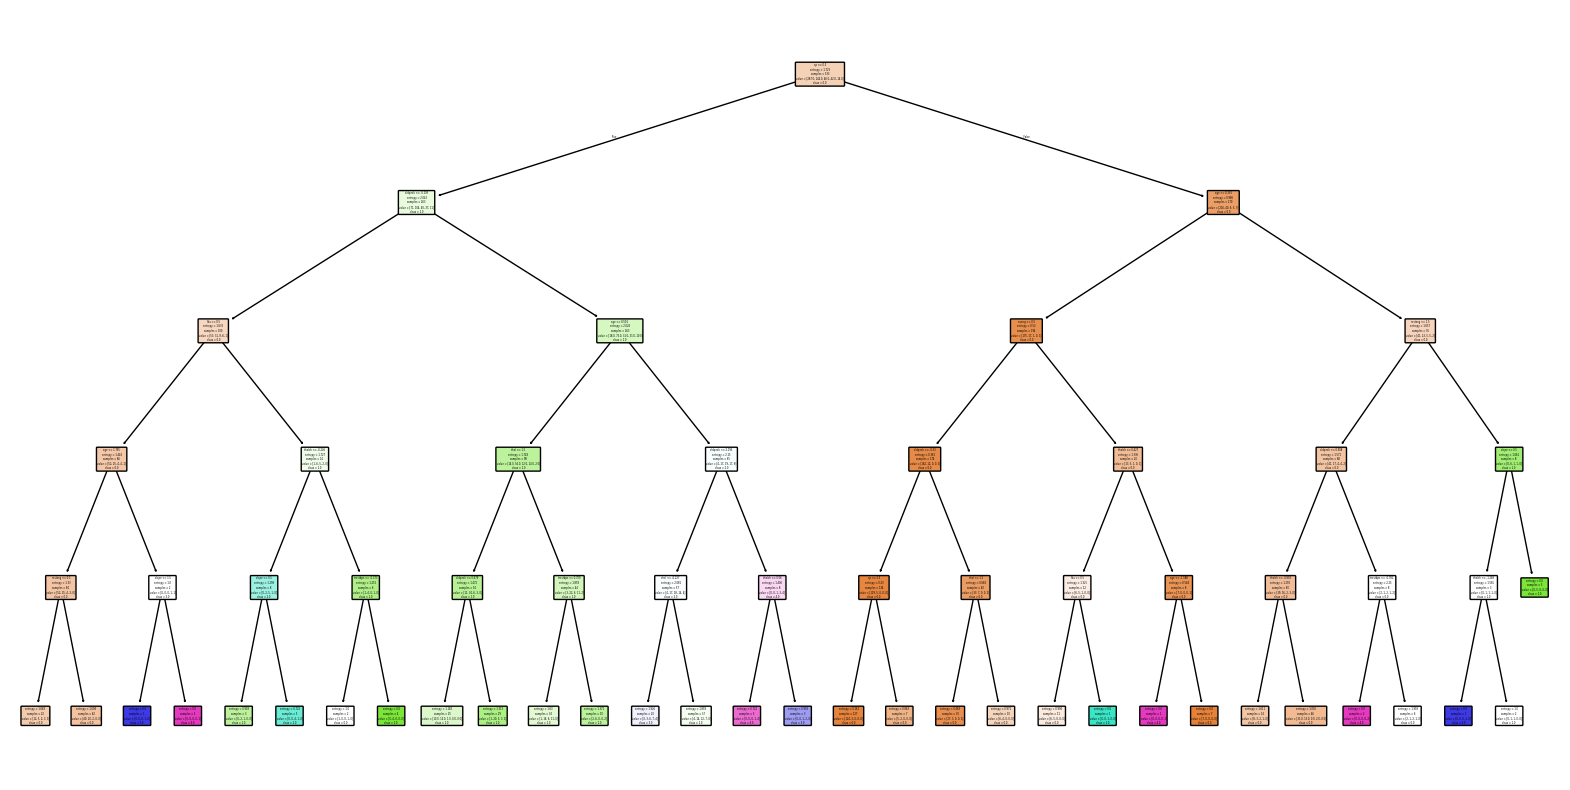

In [91]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in sorted(Y.unique())], rounded=True)
plt.show()

### Interview Questions

1.What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Key Hyperparameters of Decision Trees:
1)max_depth:
Defines the maximum depth of the tree.
2)min_samples_split:
Minimum number of samples required to split an internal node.
3)min_samples_leaf:
Minimum number of samples that a leaf node must have.
4)max_features:
Number of features to consider when looking for the best split.
5)max_leaf_nodes:
Maximum number of leaf nodes allowed.
6)criterion ("gini" or "entropy"):
Function used to measure quality of a split. 
7)min_impurity_decrease:
A node will split only if the impurity decrease is at least this value.

2.what is the difference between the Label encoding and One-hot encoding?
Label Encoding:
Converts each category into a unique integer value.
Example:
Color: [Red, Green, Blue]
Label Encoding → [0, 1, 2]

Pros:
Simple and memory efficient.
Keeps data compact.

Cons:
Introduces an artificial ordinal relationship (e.g., Blue=2 > Red=0), which may mislead models like Linear Regression.
Works better with tree-based models (Decision Trees, Random Forests, XGBoost), since they don’t assume linear relationships.

One-Hot Encoding:
Creates a binary column for each category and assigns 1 where the category is present, 0 otherwise.
Example:
Color: [Red, Green, Blue]
One-Hot Encoding
Red   Green   Blue
 1      0      0    
 0      1      0
 0      0      1
 
Pros:
Avoids ordinal relationship issue.
Works well with algorithms that rely on distance (like Logistic Regression, kNN, Neural Networks).

Cons:
Increases dimensionality (curse of dimensionality if many categories).
Not efficient for high-cardinality features (e.g., thousands of unique values like ZIP codes).